# Wildfire + Housing Analysis
This notebook contains the graphs for analyzing trends in migration relating to wildfires and housing index.

First, we import the necessary data & graphing libraries:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

We load the necessary data from the joined dataset file:

In [2]:
df = pd.read_csv("full_df_testing.csv")
df.head()

,Unnamed: 0,State,Number of fires,Number of acres burned,Year,Out,In,GDP,index_sa
0,0,Alaska,688.0,1129421.0,2010,94848.0,1961604.0,52947.7,218.6700
1,1,Alabama,2357.0,26331.0,2010,99850.0,5871042.0,175470.1,179.9575
2,2,Arkansas,2010.0,30954.0,2010,64264.0,4272858.0,100970.8,178.0375
3,3,Arizona,1517.0,74445.0,2010,177056.0,12027150.0,248125.3,182.4725
4,4,California,6502.0,108742.0,2010,575165.0,24016446.0,1973511.9,163.6975


## Wildfire Maps
We decided to heatmaps in the shape of the US States to highlights the migration movements and wildfire occurrnces.

This requires the use of the `geopandas` library and some pre-made "shapefiles" that contain geographical information about the distribution of states in the US. These supplemental files can be found in the /map directory. (You'll need to `pip install geopandas` in order to produce these graphs.)

Here, we will build two heatmaps, one of fires in the US, and one of inward migration.
We will be using 2019 data for both, as it is the most recent in the dataset.

In [3]:
# Select 2019 data for fires & inward migration
wildfire_df = df[df['Year'] == 2019]
wildfire_df = wildfire_df[['State', 'Number of fires', 'In']]

In [4]:
# Import & configure geopandas for US map creation
import geopandas as gpd
gdf = gpd.read_file("map/states_shapefile.shp")
gdf = gdf.merge(wildfire_df, left_on='NAME', right_on='State')
gdf = gdf.to_crs("EPSG:3395")

<Figure size 1200x1200 with 0 Axes>

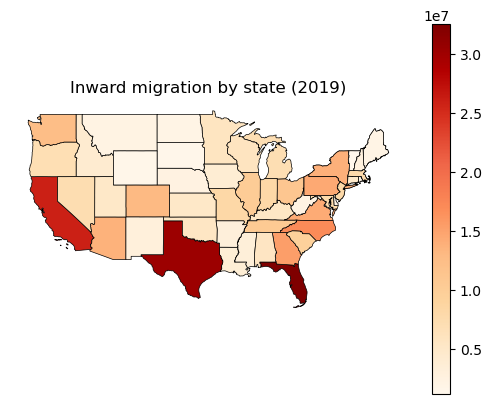

<Figure size 1200x1200 with 0 Axes>

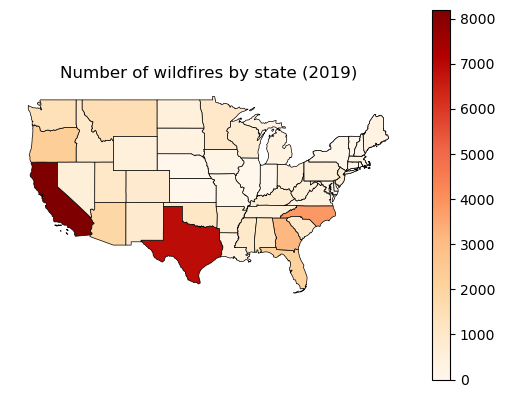

In [5]:
# Construct maps

plt.figure(figsize=(12, 12))
gdf.plot(column='In', cmap='OrRd', legend=True, edgecolor="black", linewidth=0.5)
plt.title('Inward migration by state (2019)')
plt.axis('off')
plt.show()

plt.figure(figsize=(12, 12))
gdf.plot(column='Number of fires', cmap='OrRd', legend=True, edgecolor="black", linewidth=0.5)
plt.title('Number of wildfires by state (2019)')
plt.axis('off')
plt.show()

## Housing Price Maps
We will be comparing index_sa (seasonally-adjusted housing price index) with outflow migration by state.

We have selected three states

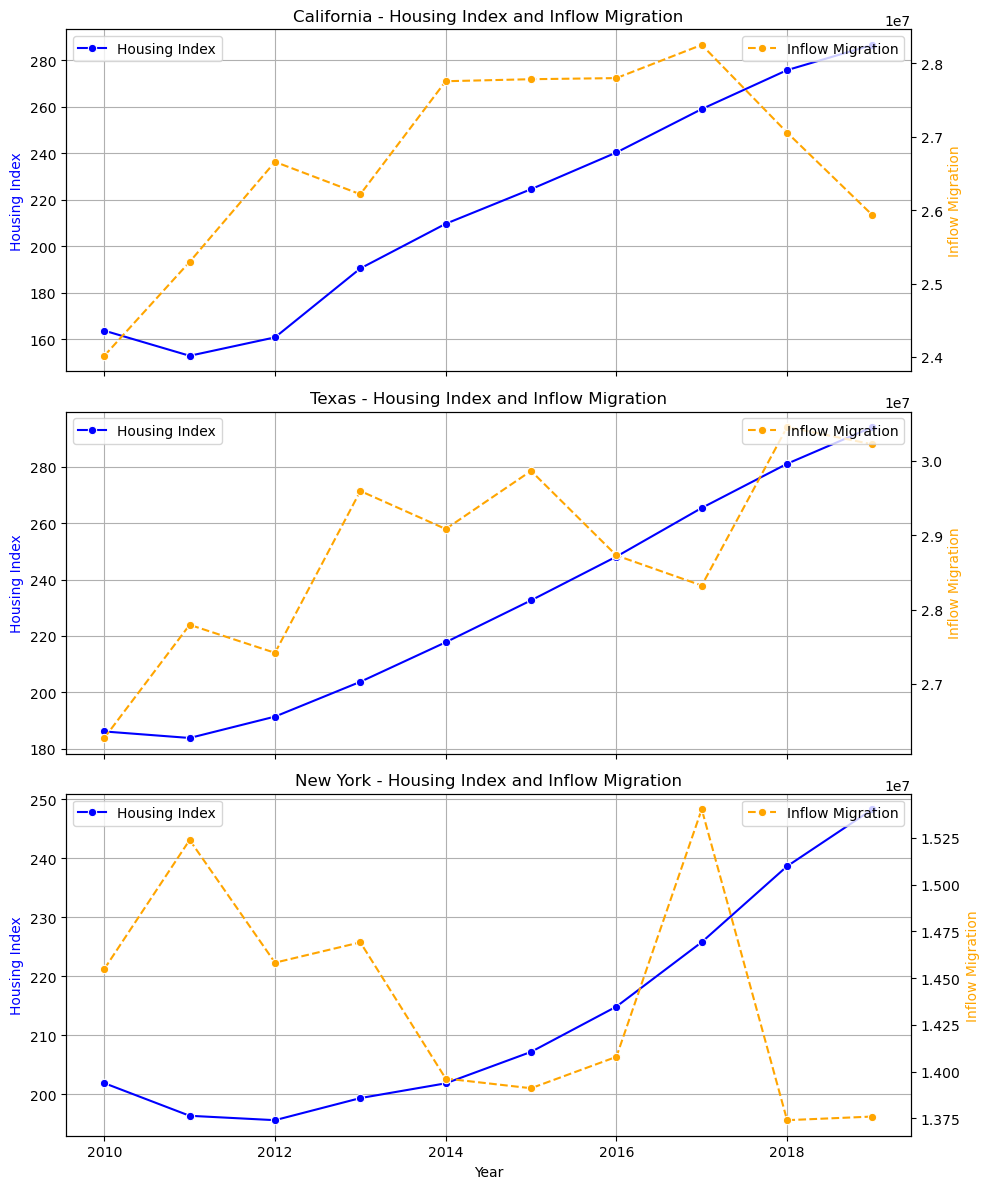

In [6]:
# Select three states to plot
selected_states = ['California', 'Texas', 'New York']

# Filter the data for the selected states
filtered_data = df[df['State'].isin(selected_states)]

# Create separate subplots for each state
fig, axes = plt.subplots(len(selected_states), 1, figsize=(10, 12), sharex=True)

# Plot 'index_sa' and outflow migration trends for each state across years
for i, state in enumerate(selected_states):

    # Create graph two axes (one for housing & one for migration)
    ax1 = axes[i].twinx()
    sns.lineplot(data=filtered_data[filtered_data['State'] == state], x='Year', y='index_sa', ax=axes[i], label='Housing Index', marker='o', color='blue')
    sns.lineplot(data=filtered_data[filtered_data['State'] == state], x='Year', y='In', ax=ax1, label='Inflow Migration', marker='o', linestyle='dashed', color='orange')

    # Set labels & legends
    axes[i].set_title(f'{state} - Housing Index and Inflow Migration')
    axes[i].set_ylabel('Housing Index', color='blue')
    ax1.set_ylabel('Inflow Migration', color='orange')
    axes[i].grid(True)
    axes[i].legend(loc='upper left')
    ax1.legend(loc='upper right')

# Shared x-label: year
plt.xlabel('Year')
plt.tight_layout()
plt.show()